<a href="https://colab.research.google.com/github/Marcfeitosa/Data-Science-Projects/blob/main/aula_datascience_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing Values



*   Missing Values são valores faltante sem colunas, esses podem ser oriundos de falhas em cargas de dados, falhas em crawlers ou até mesmo corrupção de dados.
*   Missing Values podem ser um problema em várias situações, como por exemplo, algorítmos de machine learning que não trabalham bem com dados faltantes
*   Estes também podem atrapalhar resultados de análises
*   Vamos aprender como encontrar missing values na base de dados e como manipular esses valores.



In [ ]:
!pip freeze

absl-py==1.3.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.3
aiosignal==1.3.1
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.5
Babel==2.11.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.9
bokeh==2.3.3
branca==0.6.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.2.0
catalogue==2.0.8
certifi==2022.9.24
cffi==1.15.1
cftime==1.6.2
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.8
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.3
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.2.2
cycler==0.11.0
cymem==2.0.7
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
db-dtypes==1.0.4
debugpy==1.0.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
arquivo = '/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv'
dataset = pd.read_csv(arquivo, sep=',', header=0)

In [ ]:
#consultando os valores faltantes por colunas

dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#removendo todas as linhas onde há um registro faltante em algum valor

dataset.dropna(inplace=True)

In [ ]:
#Também é possível remover linhas com valores faltantes em todas as colunas

dataset.dropna(how='all', inplace=True)

In [ ]:
#preenche com a media dos valores faltantes da coluna floors os valores null

dataset['floors'].fillna(dataset['floors'].mean(), inplace=True)

In [ ]:
#preenche com a 1 os valores null da coluna bedrooms

dataset['bedrooms'].fillna(1, inplace=True)

Vizualização de Dados

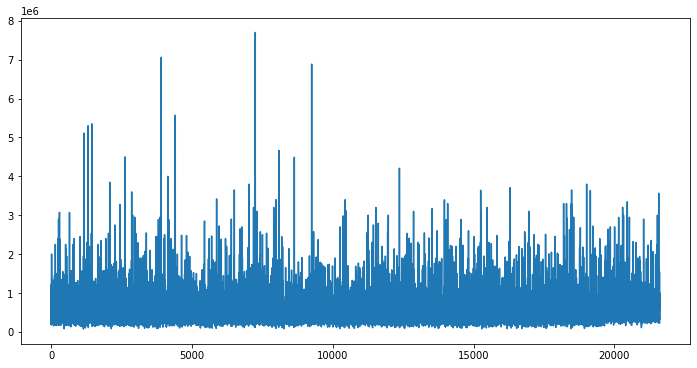

In [ ]:
#Plota em um gráfico de barras o preço dos imóveis

%matplotlib inline
plt.figure(figsize=(12,6))
dataset['price'].plot()

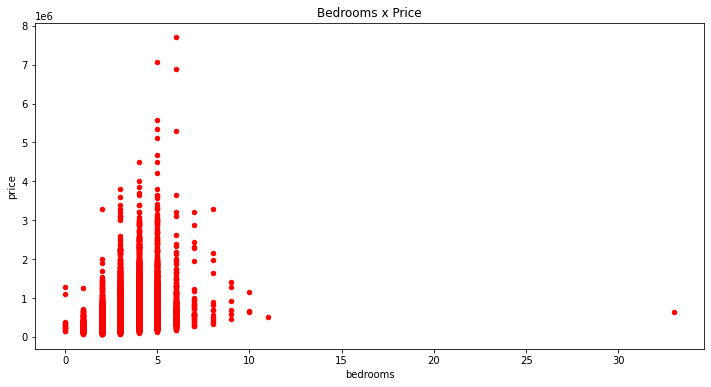

In [ ]:
#Plota em gráfico de dispersão o preço e o número de quartos de imóveis

dataset.plot(x='bedrooms',y='price',kind='scatter',title='Bedrooms x Price',color='r',figsize=(12,6))

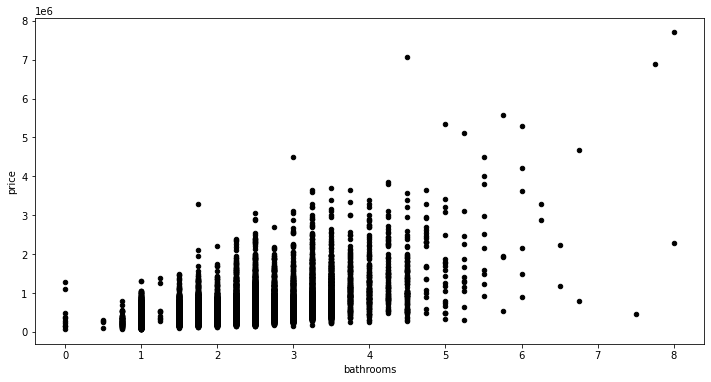

In [ ]:
#Plota em gráfico de dispersão o preço e o número de banheiros

dataset.plot(x='bathrooms',y='price',kind='scatter',color='black',figsize=(12,6))

Python para análise de dados - Pandas 02

Iremos trabalhar com base de imóveis que obtive no site do Kaglle

Você pode fazer o Download diretamente no GitHub, [aqui](https://https://content/drive/MyDrive/Colab Notebooks/kc_house_data.csv)

In [ ]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370471,2.114757,2079.899736,1.510697e+04,1.494332,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930557,0.770163,918.440897,4.142051e+04,0.539978,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


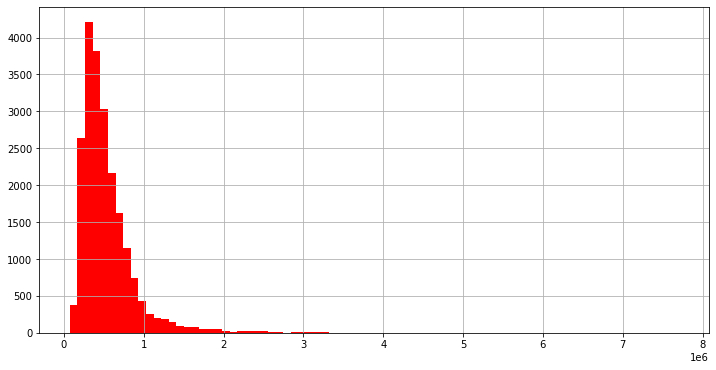

In [ ]:
#Plota um histograma com a coluna Price com 30 bins na cor vermelha

%matplotlib inline
#dataset['price'].plot(kind='hist',bins=30,figsize=(12,6),color='r')
dataset['price'].hist(bins=80, color='r',figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27a5470850>,
      dtype=object)

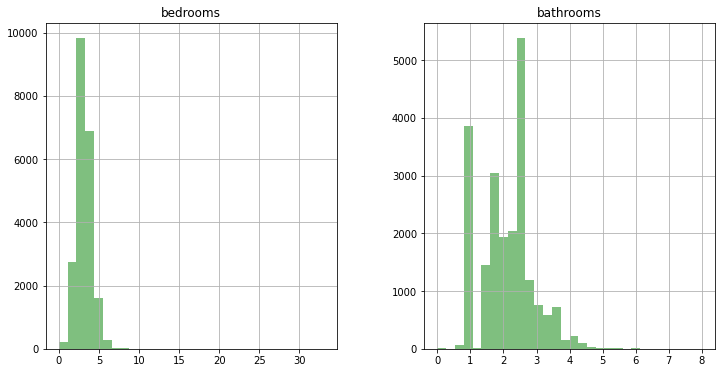

In [ ]:
#Histogramas com duas colunas

%matplotlib inline
dataset[['bedrooms','bathrooms']].hist(bins=30, color='g',figsize=(12,6),alpha=0.5)

Estatística descritiva

In [ ]:
#Imprime o valor médio da coluna bedrooms
dataset['bedrooms'].mean()

3.370471475500856

In [ ]:
#Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].max()

33.0

In [ ]:
dataset['bedrooms'].min()

0.0

In [ ]:
#desvio padrão
dataset['bedrooms'].std()

0.9305574705417993

In [ ]:
#o valor máximo
dataset['bedrooms'].skew()

1.9694182957893112

In [ ]:
# Esse método retorna o valor de simetria de cada coluna do dataset.
# Um valor zero indica uma distribuição simétrica
# Um valor maior que zero ou menor, indica uma distribuição assimétrica
# Para valores acima de zero podemos dizer que existe assimetria positiva
# Para valores acima de zero podemos dizer que existe assimetria negativa
# Isso quer dizer que os valores muito acima de zero indicam que existem mais valores acima da média
# valores abaixo de zero significa que contém mais valores abaixo da média
dataset.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


id                0.243329
price             4.024069
bedrooms          1.969418
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616121
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64